## Etude sur Introduction aux réseaux de neurones artificiels

La régression par un perceptron multi-couche sera illustrée dans un Jupyter Notebook sur l'exemple du Boston house prices dataset. Inspirez-vous de la ligne de code suivante (sklearn) :

    MLPRegressor(hidden_layer_sizes='à définir', activation='à définir', solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)


### test

1点目の特性である「データセットの少なさ」に対する対応。一般に、データのサンプル数が少なく学習モデルのパラメータ数が多い場合、過学習が起こりやすい。今回のデータも比較的少数であるため、過学習を避けるために比較的小さなニューラルネットを用いる。ここでは、隠れ層が2層、それぞれ64ノードのモデルを用いる。

### 1 - Importation des librairies Python nécessaires à la résolution du problème

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import SGD
from joblib import load
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston
import tensorflow as tf
#from keras.datasets import boston_housing
import joblib
from joblib import load
#from keras import layers
#from keras import models
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 2 - affichage

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### Chargement des données test et le modèle

In [3]:
X_test = load("X_test.joblib")
y_test = load("y_test.joblib")

In [4]:
X_test.shape, y_test.shape

((102, 13), (102,))

In [28]:
model = load_model('model.h5')

In [34]:
model_parametre = load_model('model')

### tester le model

https://keras.io/ja/getting-started/sequential-model-guide/

https://sinyblog.com/deaplearning/keras_how_to/

In [29]:
y_test_pred = model.predict(X_test).flatten()

In [8]:
print(y_test_pred)

[ 8.044594  17.827991  21.256859  30.031984  25.63167   17.909567
 27.14936   24.14579   20.371534  22.142647  13.287539  15.446976
 16.537897  38.994003  19.84325   18.691643  25.850155  19.59216
 19.304012  32.40337    9.980392  13.0360985 20.402754  12.782566
 21.220192  25.827974  28.59103   28.313831  11.402115  23.316914
 20.56193   13.944208  33.401886  24.85891   17.504398   9.436203
 15.488928  17.46368   18.137512  26.357069  28.433529  27.606478
 14.38493   39.132763  29.82104   23.760899  26.061935  18.121914
 22.83066   22.05149   34.53998   19.694942  11.918188  16.506985
 35.953506  27.312107  13.273703  48.869835  33.519054  22.73313
 24.773508  16.963285  14.253645  18.026798  23.475086  23.612274
 14.258472  23.76704   14.363796   7.462492  32.60197   29.676022
 25.934847  14.737598  23.592846  18.514977  22.509594  23.42176
 33.124702  11.82107   19.356228  38.014034  14.191156  15.241411
 17.755672  17.723677  21.696035  17.688484  22.173223  32.89705
 20.67414   19

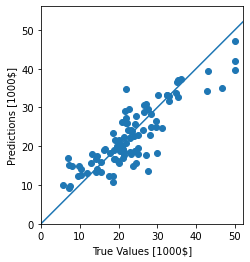

In [30]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

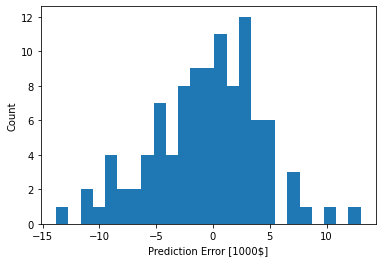

In [31]:
error = y_test_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")

In [32]:
loss, mae = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} [1000$]".format(mae))


4/4 - 0s - loss: 23.1841 - mean_absolute_error: 3.7243 - 153ms/epoch - 38ms/step
Testing set Mean Abs Error:  3.72 [1000$]


In [33]:
# model without ajusting hyper parameter
y_test_pred = model.predict(X_test).flatten()
print('R2 score: {0:0.2%}'.format(r2_score(y_test, y_test_pred)))
print('RMSE: {}'.format(mean_squared_error(y_test, y_test_pred, squared=False)))

R2 score: 72.15%
RMSE: 4.81498526067964


In [35]:
# model avec hyper parameter with learning_rate=0.1, unit(neuron)=12
y_test_pred_p = model_parametre.predict(X_test).flatten()
print('R2 score: {0:0.2%}'.format(r2_score(y_test, y_test_pred_p)))
print('RMSE: {}'.format(mean_squared_error(y_test, y_test_pred_p, squared=False)))

R2 score: 69.70%
RMSE: 5.021873592040548


### observation
Resultat de model hyperparamètré est moin bien.

# memo

学習したニューラルネットのパラメーター(重み) Paramètres (poids) du réseau neuronal

In [21]:
w = model.get_weights()

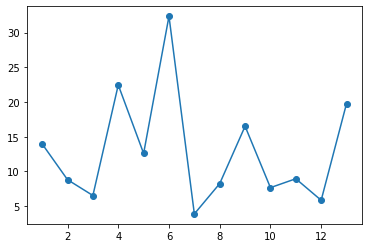

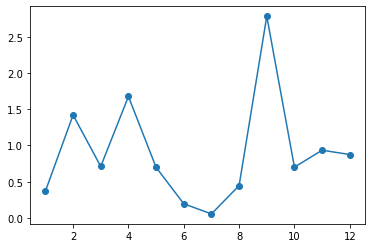

In [18]:
for i in range(len(model.layers)):
    # ニューラルネットの各層について、重みの絶対値の総和をプロット
    w1 = model.layers[i].get_weights()[0]
    plt.figure()
    plt.plot(range(1, len(w1)+1), (w1**2).sum(axis=1), 'o-')
    plt.show()

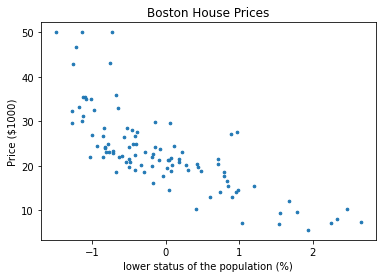

In [19]:
# 13番目の説明変数と目的変数を散布図としてプロットPlot the thirteenth explanatory and objective variable as a scatter plot
plt.title("Boston House Prices")
plt.ylabel("Price ($1000)")
plt.xlabel("lower status of the population (%)")

plt.scatter(X_test[:,12], y_test, s=7)
plt.show()

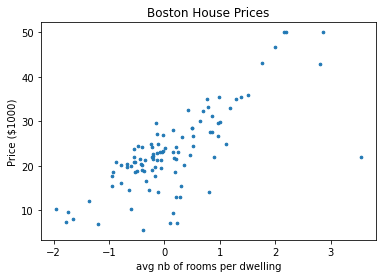

In [20]:
# 6番目の説明変数と目的変数を散布図としてプロットPlot the thirteenth explanatory and objective variable as a scatter plot
plt.title("Boston House Prices")
plt.ylabel("Price ($1000)")
plt.xlabel("avg nb of rooms per dwelling")
values = [1,2,3,4,5,6]
#plt.xticks(values)
plt.scatter(X_test[:,5], y_test, s=7)
plt.show()